<a href="https://colab.research.google.com/github/alu62/ME233_FinalProject/blob/main/ME233_RubberCANN_W25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated Model Discovery for RTV-2 Silicone Rubber

Model Discovery Papers:
1. Invariant-based: https://www.sciencedirect.com/science/article/pii/S1742706123000661
2. Principal-stretch-based: https://www.sciencedirect.com/science/article/pii/S2666522023000047

Brain Data Reference: https://www.sciencedirect.com/science/article/pii/S1742706116305633

Code by Skyler St. Pierre & Kevin Linka \\
Last edited February 2025

Code Modified by Alexander Lu, Nachuan You, Ruitao Su, Yixiang Guo \\
Last edited March 2025

## Problem description

A hyperelastic or Green-elastic materials with can directly be defined by the Piola stress
$$
  \mathbf{P}
= \frac{\partial \psi (\mathbf{F})}{\partial \mathbf{F}} \,,
$$
in dependency of the strain energy function $\Psi$ and the deforation gradient $\mathbf{F}$. Now, by contraining the material symmetry to the special case of isotropy, the strain energy function can be given as a function of the first three strain invariants as $\Psi(I_1, \, I_2,\, I_3)$


We can further constrain the choice of the free energy function $\psi$ for the special case of perfect incompressibility for which the Jacobian remains constant and equal to one, $I_3 = 1$. So we obtain for the Piola stress tensor
$$
  \mathbf{P}
= \frac{\partial \psi}{\partial I_1} \frac{\partial I_1}{\partial \mathbf{F}}
+ \frac{\partial \psi}{\partial I_2} \frac{\partial I_2}{\partial \mathbf{F}}
- p\, \mathbf{F}^{\rm {-t}}  
~~~~~=~~~~~ 2 \left[\frac{\partial \psi}{\partial I_1}
   + I_1 \frac{\partial \psi}{\partial I_2} \right] \mathbf{F}
-2 \frac{\partial \psi}{\partial I_2}
   \mathbf{F} \cdot \mathbf{F}^{\rm {t}} \cdot \mathbf{F}
- p\, \mathbf{F}^{\rm {-t}} \, .     
$$

This implies that we reduce the input to a set of only two invariants, $I_1$ and $I_2$ as functional basis of the strain energy we want to obtain.


Before we start with discovering the strain energy function, dependent on the first two invariants, we have to initialize all necessary python pckages and load the brain data.




### 0. Load python packages

In [ ]:
# # the current colab versions are not compatible with this notebook so we need to install these older package versions
!pip install matplotlib==3.2.2
!pip install tensorflow==2.12.0
!pip install numpy==1.23.5
!pip install pandas==1.5.3
# do not restart the runtime until all packages have been installed (hit cancel on the pop-up)!!
# the errors in red that print out can be ignored; they will not affect this code

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.2.2-cp311-cp311-linux_x86_64.whl size=11975845 sha256=c271e5074ace93c3ac8dc42a1d2a1513ecc07ed1933f18fe6cbea8999ae943b1
  Stored in directory: /root/.cache/pip/wheels/24/49/a7/b00a675ec9397a601599e7d1e21489f0d9d6eb7871f5f38957
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.13.2 requires matplotlib!=3.6.1,>=3.4, but you have matplotlib 3.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.2.2 which is incompatible.
bigframes 1.38.0 requir

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninsta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
seaborn 0.13.2 requires matplotlib!=3.6.1,>=3.4, but you have matplotlib 3.2.2 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.2.2 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
pymc 5.20.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.38.0 requires matp

**Select `Runtime` > `Restart Session` at the top of the file before running the next code block!**

In [ ]:
# import necessary python packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
import json
import pandas as pd
import os
import copy
from sklearn.metrics import mean_squared_error, r2_score


# Check Versions
print('Numpy: ' + np.__version__) # 1.23.5
print('Matplotlib: ' + matplotlib.__version__) # 3.2.2
print('Tensorflow: ' + tf.__version__) # 2.12.0
print('Keras: ' + keras.__version__)
print('Pandas: ' + pd.__version__) # 1.5.3

Numpy: 1.23.5
Matplotlib: 3.2.2
Tensorflow: 2.12.0
Keras: 2.12.0
Pandas: 1.5.3


In [ ]:
#Import excel file, change to match where you saved the file
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/PROJECT/' # change to where you download this; must be in Google Drive
#path = '/content/drive/MyDrive/PROJECT/'
dfs = pd.read_excel(path + 'elastosil7683_truncated.xlsx', sheet_name='Sheet1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Make path to save results to
def makeDIR(path):
    if not os.path.exists(path):
        os.makedirs(path)

filename = 'elastosil7683' # Change to keep track of different data e.g. Brain, Skin, Muscle, etc.
# path2saveRaw = path + 'Results/'+filename+'/RawData'
# makeDIR(path2saveRaw)

### 1. Load Brain data

In [ ]:
# Load data for different brain regions
def getStressStrain(Region):

    if Region =='CX':
        P_ut = dfs.iloc[1:,1].dropna().astype(np.float64)
        lam_ut = dfs.iloc[1:,0].dropna().astype(np.float64)

        # P_ss = dfs.iloc[3:,3].dropna().astype(np.float64).values
    #     # gamma_ss = dfs.iloc[3:,2].dropna().astype(np.float64).values
    # elif Region =='CR':
    #     P_ut = dfs.iloc[3:,6].dropna().astype(np.float64)
    #     lam_ut = dfs.iloc[3:,5].dropna().astype(np.float64)

    #     P_ss = dfs.iloc[3:,8].dropna().astype(np.float64).values
    #     gamma_ss = dfs.iloc[3:,7].dropna().astype(np.float64).values
    # elif Region =='BG':
    #     P_ut = dfs.iloc[3:,11].dropna().astype(np.float64)
    #     lam_ut = dfs.iloc[3:,10].dropna().astype(np.float64)

    #     P_ss = dfs.iloc[3:,13].dropna().astype(np.float64).values
    #     gamma_ss = dfs.iloc[3:,12].dropna().astype(np.float64).values
    # elif Region =='CC':
    #     P_ut = dfs.iloc[3:,16].dropna().astype(np.float64)
    #     lam_ut = dfs.iloc[3:,15].dropna().astype(np.float64)

    #     P_ss = dfs.iloc[3:,18].dropna().astype(np.float64).values
    #     gamma_ss = dfs.iloc[3:,17].dropna().astype(np.float64).values

    return P_ut, lam_ut

# Define different loading protocols
def traindata(modelFit_mode):
    if modelFit_mode == 'T':
        model_given = model_UT
        input_train = lam_ut[:3239]
        output_train = P_ut[:3239]
        sample_weights = np.array([1.0]*input_train.shape[0])

    # elif modelFit_mode == "C":
    #     model_given = model_UT
    #     input_train = lam_ut[:17]
    #     output_train = P_ut[:17]
    #     sample_weights = np.array([1.0]*input_train.shape[0])

    # elif modelFit_mode == "SS":
    #     model_given = model_SS
    #     input_train = gamma_ss
    #     output_train = P_ss
    #     sample_weights = np.array([1.0]*input_train.shape[0])

    # elif modelFit_mode == "TC_and_SS":
    #     model_given = model
    #     input_train = [[lam_ut], [gamma_ss]]
    #     output_train = [[P_ut], [P_ss]]
    #     # normalize each Ten, Com, Shr by respective max absolute stress
    #     sample_weights_tc = np.array([1.0] * lam_ut.shape[0])
    #     sample_weights_tc[16:] = 1 / np.max(np.abs(P_ut[16:]))  # weight by max tension
    #     sample_weights_tc[:16] = 1 / np.max(np.abs(P_ut[:16]))  # weight by max compression
    #     sample_weights_ss = np.array([1.0] * gamma_ss.shape[0]) / np.max(np.abs(P_ss))  # weight by max shear
    #     sample_weights = [[sample_weights_tc], [sample_weights_ss]]
    return model_given, input_train, output_train, sample_weights

In [ ]:
# Select region to investigate: CX = cortex, CC = corpus callosum, BG = basal ganglia, CR = corona radiata
Region_test = 'CX'  # corpus callosum
P_ut, lam_ut = getStressStrain(Region_test)


In [ ]:
# HW Problem 2.1a: Plot tension and compression
plt.figure(figsize=(12.5,8.33))
plt.plot(stretch,stress,color='blue')
plt.plot(np.linspace(0.9, 1.1, 100), np.linspace(0,0,100),'k')
plt.plot(np.linspace(1, 1, 100), np.linspace(-0.5,0.1,100),'k')
plt.xlabel('Stretch')
plt.ylabel('Stress')
plt.title('corpus callosum: compression & tension')
plt.tight_layout(pad=2)
plt.savefig(path2saveRaw + '/' + Region_test + '_TenCom' + '.pdf')

NameError: name 'stretch' is not defined

<Figure size 1250x833 with 0 Axes>

### L1 and L2 regularization with penalty weight



In [ ]:
def regularize(reg, pen):
    if reg == 'L2':
        return keras.regularizers.l2(pen)
    if reg == 'L1':
        return keras.regularizers.l1(pen)

## 2b. Strain Energy Model - Principal-stretch-based


Next, we define the strain energy function for our isotropic, perfectly incompressible Constitutive Artificial Neural Network with one hidden layers and twenty nodes using the principal stretches.
The set of equations for this network takes the following explicit form,


$$ \begin{array}{l@{\hspace*{0.05cm}}r@{\hspace*{0.05cm}}
              l@{\hspace*{0.05cm}}l@{\hspace*{0.00cm}}
              c@{\hspace*{0.05cm}}c@{\hspace*{0.05cm}}
              l@{\hspace*{0.05cm}}l@{\hspace*{0.00cm}}
              l@{\hspace*{0.05cm}}c@{\hspace*{0.05cm}}
              l@{\hspace*{0.05cm}}l@{\hspace*{0.00cm}}l}
   \psi
&= \sum_{i=1}^3 &
    w_1   &[\lambda_i^{-30}&-1]
&+& w_2   &[\lambda_i^{-28}&-1]
&+& w_3   &[\lambda_i^{-26}&-1] \\
&+& w_4   &[\lambda_i^{-24}&-1]
&+& w_5   &[\lambda_i^{-22}&-1]  
&+& w_6   &[\lambda_i^{-20}&-1] \\
&+& w_7   &[\lambda_i^{-18}&-1]
&+& w_8   &[\lambda_i^{-16}&-1]
&+& w_9   &[\lambda_i^{-14}&-1]  \\
&+& w_{10}&[\lambda_i^{-12}&-1]
&+& w_{11}&[\lambda_i^{-10}&-1]
&+& w_{12}&[\lambda_i^{-8}&-1] \\
&+& w_{13}&[\lambda_i^{-6}&-1]
&+& w_{14}&[\lambda_i^{-4}&-1]
&+& w_{15}&[\lambda_i^{-2}&-1] \\
&+& w_{16}&[\lambda_i^{+2}&-1]
&+& w_{17}&[\lambda_i^{+4}&-1]
&+& w_{18}&[\lambda_i^{+6}&-1] \\
&+& w_{19}&[\lambda_i^{+8}&-1]
&+& w_{20}&[\lambda_i^{+10}&-1]&
\end{array}
$$

In [ ]:
initializer_exp = tf.keras.initializers.RandomUniform(minval=0., maxval=0.001, seed=np.random.randint(0,10000)) # use random integer as seed
initializer_1 = 'glorot_normal'

# Self defined activation functions for exp term
def activation_Exp(x):
    return 1.0*(tf.math.exp(x) -1.0)
# Self defined activation functions for ln term
def activation_ln(x):
    return -1.0*tf.math.log(1.0 - (x))


def princStretch(inputs): # convert invariants to principal stretches
    (I1_in, I2_in) = inputs
    Stretch_1_0 = 1.0

    Q = (tf.math.pow(I1_in, 2) - 3.0 * I2_in) + 0.001
    R = ((-9.0 * I1_in * I2_in) + 27.0 + (2.0 * tf.math.pow(I1_in, 3)))
    Theta = tf.math.acos(R / (2.0 * tf.math.pow(Q, 3 / 2)))

    Stretch_1 = 1.0 / 3.0 * (
                I1_in + 2.0 * tf.math.sqrt(Q) * tf.math.cos(1.0 / 3.0 * (Theta + 2.0 * np.pi * (1.0 - 1.0))))
    Stretch_2 = 1.0 / 3.0 * (
                I1_in + 2.0 * tf.math.sqrt(Q) * tf.math.cos(1.0 / 3.0 * (Theta + 2.0 * np.pi * (2.0 - 1.0))))
    Stretch_3 = 1.0 / 3.0 * (
                I1_in + 2.0 * tf.math.sqrt(Q) * tf.math.cos(1.0 / 3.0 * (Theta + 2.0 * np.pi * (3.0 - 1.0))))

    return tf.math.sqrt(Stretch_1), tf.math.sqrt(Stretch_2), tf.math.sqrt(Stretch_3), Q


def SingleInvImproved(I1_ref, reg, pen):

    I_1_w1 = keras.layers.Dense(
        1,
        kernel_initializer=initializer_1,
        kernel_constraint=keras.constraints.NonNeg(),
        kernel_regularizer=regularize(reg, pen),
        use_bias=False,
        activation=None,
        # name=f'w_{counter}_1'
    )(I1_ref)

    I_1_w2 = keras.layers.Dense(
        1,
        kernel_initializer=initializer_exp,
        kernel_constraint=keras.constraints.NonNeg(),
        kernel_regularizer=regularize(reg, pen),
        use_bias=False,
        activation=activation_Exp,
        # name=f'w_{counter}_2'
    )(I1_ref)

    collect_out = tf.keras.layers.concatenate([I_1_w1, I_1_w2], axis=1)

    return collect_out

def StrainEnergyCANN_stretch(reg, pen):
    # Inputs defined
    I1_in = tf.keras.Input(shape=(1,), name='I1')
    I2_in = tf.keras.Input(shape=(1,), name='I2')
    # Get principal stretches
    Stretch_1, Stretch_2, Stretch_3, Q = keras.layers.Lambda(
        function=princStretch,
        name='P_stretch'
    )([I1_in, I2_in])

    ALL_I_out_arr = []
    counter = 0  # Unique index for naming
    for i in range(-8, 10, 2):  # define range of exponential powers and number of terms
        if i != 0:
            I1_out = SingleInvImproved(Stretch_1 ** i + Stretch_2 ** i + Stretch_3 ** i - 3.0, reg, pen)
            ALL_I_out_arr.append(I1_out)
            counter += 1

    ALL_I_out = tf.keras.layers.concatenate(ALL_I_out_arr, axis=1)
    amount_terms = len(ALL_I_out_arr)

    W_ANN = keras.layers.Dense(
        1,
        kernel_initializer='glorot_normal',
        kernel_constraint=keras.constraints.NonNeg(),
        kernel_regularizer=regularize(reg, pen),
        use_bias=False,
        activation=None,
        name='wx2'
    )(ALL_I_out)

    Psi_model = keras.models.Model(inputs=[I1_in, I2_in], outputs=[W_ANN], name='Psi')
    return Psi_model, amount_terms*2



### 3. Stress Models


####  Tension and compression

For the case of uniaxial tension and compression, we stretch the specimen in one direction,
$F_{11} = \lambda_1 = \lambda$.
For an isotropic, perfectly incompressible material with
$I_3 = \lambda_1^2  \lambda_2^2  \lambda_3^2 = 1$,
the stretches orthogonal to the loading direction are identical and equal to the square root of the stretch,
$F_{22} = \lambda_2 = \lambda^{-1/2}$ and
$F_{33} = \lambda_3 = \lambda^{-1/2}$.
From the resulting deformation gradient,
$F= {\rm{diag}} \, \{ \; \lambda, \lambda^{-1/2}, \lambda^{-1/2} \,\}$,
we calculate the first and second invariants and their derivatives,

$$
  I_1
= \lambda^2 + \frac{2}{\lambda}
  \quad \mbox{and} \quad
  I_2
= 2\lambda + \frac{1}{\lambda^2}
  \quad \mbox{with} \quad
  \frac{\partial I_1}{\partial  \lambda}
= 2 \, \left[\lambda - \frac{1}{\lambda^2} \right]
  \quad \mbox{and} \quad
  \frac{\partial I_2}{\partial  \lambda}
= 2 \, \left[1 - \frac{1}{\lambda^3}\right] \,,
$$

to evaluate the nominal uniaxial stress $P_{11}$
using the general stress-stretch relationship for perfectly incompressible materials,
$ P_{ii}
= [{\partial \psi}/{\partial I_1}] \,
  [{\partial I_1} /{\partial \lambda_i}]
+ [{\partial \psi}/{\partial I_2}] \,
  [{\partial I_2} /{\partial \lambda_i}]
- [{1}/{\lambda_i}] \, p $,
for $i = 1,2,3$.
Here, $p$ denotes the hydrostatic pressure that we determine from the zero stress condition in the transverse directions, $P_{22} = 0$ and $P_{33} = 0$, as
$ p
= [{2}/{\lambda}] \;
  {\partial \psi}/{\partial I_1}
+ [2\lambda+{2}/{\lambda^2}] \,
  {\partial \psi}/{\partial I_2}$.
This results in the following explicit uniaxial stress-stretch relation for perfectly incompressible, isotropic materials,

$$
  P_{11}
= 2 \,
  \left[
  \frac{\partial \psi}{\partial I_1}
+ \frac{1}{\lambda}
  \frac{\partial \psi}{\partial I_2}
  \right]
  \left[
  \lambda - \frac{1}{\lambda^2}
  \right]\,.
$$


In [ ]:
def Stress_calc_TC(inputs):
    (dPsidI1, dPsidI2, Stretch) = inputs
    one = tf.constant(1.0,dtype='float32')
    two = tf.constant(2.0,dtype='float32')
    minus  = two * (dPsidI1 *  one/ K.square(Stretch)  + dPsidI2 * one/K.pow(Stretch,3))
    stress = two * (dPsidI1 *  Stretch + dPsidI2 * one) - minus

    return stress

####  Shear

For the case of simple shear, we shear the specimen in one direction, $F_{12} = \gamma$.
For an isotropic, perfectly incompressible material with
$F_{11} = F_{22} = F_{33} = 1$,
we calculate the first and second invariants and their derivatives,
$$
  I_1
= 3 + \gamma^2
  \quad \mbox{and} \quad
  I_2
= 3 + \gamma^2
  \quad \mbox{with} \quad
  \frac{\partial I_1}{\partial  \lambda}
= 2 \, \gamma
  \quad \mbox{and} \quad
  \frac{\partial I_2}{\partial  \lambda}
= 2 \, \gamma \,,
$$
to evalute the nominal shear stress $P_{12}$
using the general stress-stretch relationship for perfectly incompressible materials.
This results in the following explicit shear stress-strain relation for perfectly incompressible, isotropic materials,
$$
  P_{12}
= 2\,
  \left[
  \frac{\partial \psi}{\partial I_1}
+ \frac{\partial \psi}{\partial I_2}
  \right]
  \gamma\,.
$$


In [ ]:
# Simple shear stress P12
def Stress_cal_SS(inputs):
    (dPsidI1, dPsidI2, gamma) = inputs
    two = tf.constant(2.0,dtype='float32')
    stress = two * gamma * (dPsidI1  + dPsidI2)

    return stress

Finally, we can define seperate stress models for tension/compression, shear and a combination of all loading states.

In [ ]:
# Gradient function
def myGradient(a, b):
    der = tf.gradients(a, b, unconnected_gradients='zero')
    return der[0]

def modelArchitecture(Psi_model):
    # Stretch and Gamma as input
    Stretch = keras.layers.Input(shape = (1,),
                                  name = 'Stretch')
    # Gamma = keras.layers.Input(shape = (1,),
                                  # name = 'gamma')

    # specific Invariants UT
    I1_UT = keras.layers.Lambda(lambda x: x**2   + 2.0/x  )(Stretch)
    I2_UT = keras.layers.Lambda(lambda x: 2.0*x  + 1/x**2 )(Stretch)

    #% load specific models
    Psi_UT = Psi_model([I1_UT, I2_UT])

    # derivative UT
    dWI1_UT  = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_UT, I1_UT])
    dWdI2_UT = keras.layers.Lambda(lambda x: myGradient(x[0], x[1]))([Psi_UT, I2_UT])

    # Stress UT
    Stress_UT = keras.layers.Lambda(function = Stress_calc_TC,
                                name = 'Stress_UT')([dWI1_UT,dWdI2_UT,Stretch])

    # Define model for different load case
    model_UT = keras.models.Model(inputs=Stretch, outputs= Stress_UT)
    # Combined model
    model = keras.models.Model(inputs=[model_UT.inputs], outputs=[model_UT.outputs])

    return model_UT, Psi_model, model


### 4. Compile model

The compiler definition comprises the loss function definition (here a mean squared error metric), the optimizer (here an Adam optimizer) and the evaluation metric (also mean squared error).

Moreover, we define model callbacks and the keras fit function. The latter obtains the information about which model we want to fit with which data.

In [ ]:
# Optimization utilities
def Compile_and_fit(model_given, input_train, output_train, epochs, path_checkpoint, sample_weights):

    mse_loss = keras.losses.MeanSquaredError()
    metrics  =[keras.metrics.MeanSquaredError()]
    opti1    = tf.optimizers.Adam(learning_rate=0.001)

    model_given.compile(loss=mse_loss,
                  optimizer=opti1,
                  metrics=metrics)

    # if training loss starts to increase, stop training after 3000 additional epochs = "patience"
    es_callback = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0, patience=100, restore_best_weights=True)

    modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=0,
    save_weights_only=True,
    save_best_only=True, # save only the best weights across all epochs
    )


    history = model_given.fit(input_train,
                        output_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.0,
                        callbacks=[es_callback, modelckpt_callback], # save best weights if stop early or go through all epochs
                        shuffle = True,
                        verbose = 0, # verbose = 2 will print loss each epoch
                        sample_weight = sample_weights)

    return model_given, history


### 5. Plot functions

Here we define some plot functions to be used to plot the results later on

In [ ]:
def plotLoss(axe, history):
    axe.plot(history)
    axe.set_yscale('log')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

In [ ]:
# plot the contribution of each term to the model stress prediction

def color_map(ax, stretch, model, model_weights, Psi_model, cmaplist, terms, model_type):
    predictions = np.zeros([stretch.shape[0], terms])
    model_plot = copy.deepcopy(model_weights)  # deep copy model weights


    for i in range(terms):
        if model_type == 'Invariant':
            model_plot = np.zeros_like(model_weights)  # wx1 all set to zero
            model_plot[i] = model_weights[i]  # wx1[i] set to trained value
        else:  # for architectures with multiple layers (invariant)
            model_plot[-1] = np.zeros_like(model_weights[-1])  # wx2 all set to zero
            model_plot[-1][i] = model_weights[-1][i]  # wx2[i] set to trained value

        Psi_model.set_weights(model_plot)
        lower = np.sum(predictions, axis=1)
        upper = lower + model.predict(stretch, verbose=0)[:].flatten()
        predictions[:, i] = model.predict(stretch, verbose=0)[:].flatten()
        ax.fill_between(stretch[:], lower.flatten(), upper.flatten(), lw=0, zorder=i + 1, color=cmaplist[i],
                         label=i + 1)
        # if i == 0:  # one or two term models, get the correct color
        #     ax.fill_between(stretch[:], lower.flatten(), upper.flatten(), lw=0, zorder=i + 1, color=cmaplist[0],
        #                      label=i + 1)
        # else:
        #     ax.fill_between(stretch[:], lower.flatten(), upper.flatten(), lw=0, zorder=i + 1, color=cmaplist[7],
        #                      label=i + 1)
        ax.plot(stretch, upper, lw=0.4, zorder=34, color='k')



In [ ]:
plt.rcParams['xtick.major.pad'] = 14 # set plotting parameters
plt.rcParams['ytick.major.pad'] = 14

# plot tension, compression, and shear brain data with color maps

def plotMapTen(ax, Psi_model, model_weights, model_UT, terms, lam_ut, P_ut, Region, path2saveResults, modelFit_mode, model_type):
    if model_type == 'Invariant':
        numTerms = 12
    elif model_type == 'Stretch':
        numTerms = 16  # change if change range
    cmap = plt.cm.get_cmap('jet_r', numTerms)  # define the colormap with the number of terms from the full network
    # this way, we can use 1 or 2 term models and have the colors be the same for those terms
    cmaplist = [cmap(i) for i in range(cmap.N)]
    ax.tick_params('y', labelsize=16)
    ax.tick_params('x', labelsize=16)
    color_map(ax, lam_ut, model_UT, model_weights, Psi_model, cmaplist, terms, model_type)
    ax.scatter(lam_ut, P_ut, s=200, zorder=103, lw=3, facecolors='w', edgecolors='k', clip_on=False)
    plt.xlabel('Stretch (-)', fontsize=18)
    plt.ylabel('Stress (MPa)', fontsize=18)
    plt.tight_layout(pad=2)
    plt.savefig(path2saveResults + '/Section_1' + 'Train'+ modelFit_mode + '_' + 'Region' + Region + '.pdf')
    plt.close();

def plotMapCom(ax, Psi_model, model_weights, model_UT, terms, lam_ut, P_ut, Region, path2saveResults, modelFit_mode, model_type):
    if model_type == 'Invariant':
        numTerms = 12
    elif model_type == 'Stretch':
        numTerms = 16  # change if change range
    cmap = plt.cm.get_cmap('jet_r', numTerms)  # define the colormap with the number of terms from the full network
    cmaplist = [cmap(i) for i in range(cmap.N)]
    ax.tick_params('y', labelsize=16)
    ax.tick_params('x', labelsize=16)
    color_map(ax, lam_ut, model_UT, model_weights, Psi_model, cmaplist, terms, model_type)
    ax.scatter(lam_ut, P_ut, s=800, zorder=103, lw=3, facecolors='w', edgecolors='k', clip_on=False)
    plt.xlabel('Stretch (-)', fontsize=18)
    plt.ylabel('Stress (MPa)', fontsize=18)
    plt.tight_layout(pad=2)
    plt.savefig(path2saveResults + '/Section_2' + 'Train'+ modelFit_mode + '_' + 'Region' + Region + '.pdf')
    plt.close();


### 6. Model Training

Parameters and definitions for the model training. Try changing the number of epochs and toggling between the invariant and principal-stretch-based model. Make sure to rename the model_type variable for each test.

In [ ]:
train = False
epochs = 5000 # try 5,000-20,000 epochs for a good fit
batch_size = 8
folder_name = 'ME233_W25' # name the folder for your results

### Choose regularization type & penalty amount
# Option: 'L1', 'L2'
reg = 'L1'
pen = 0.00001  # Use 0 for no regularization

### Choose which model type to build CANN architecture with
# Options: 'Stretch', 'Invariant'
# 'Stretch' is principal-stretch-based and contains stretches raised to fixed powers (range & number of terms can be adjusted)
# 'Invariant' is invariant-based and contains I2, I2, I1^2, I2^2 and all with exp() and ln() activations
model_type = 'Stretch'

### Choose which loading modes to train with
# Options: 'T', 'C', 'SS', 'TC_and_SS' (tension, compression, simple shear, tension/compression & simple shear)
modelFit_mode_all = ['T']

### Choose which types of artificial meat to train with
# Options: 'CC', 'CX', 'BG', 'CR'
Region_all = ['CX']
################################################

path2saveResults_0 = path + 'L1 0.00001 Section 1(1 to 2) to predit section 2 (2 to 3)/'+filename+'/'+folder_name
makeDIR(path2saveResults_0)

Model_summary = path2saveResults_0 + '/Model_summary.txt'

In [ ]:
# for w in model_weights_0:
#   for i in w:
#     print(i)

# print(len(model_weights_0))
print(terms)

16


In [ ]:
# #  Training and validation loop
count = 1
for id1, Region in enumerate(Region_all): # loop through brain region data

    #R2_all_Regions = []
    for id2, modelFit_mode in enumerate(modelFit_mode_all): # loop through model training modes

        print(40*'=')
        print("Comp {:d} / {:d}".format(count, len(Region_all)*len(modelFit_mode_all)))
        print(40*'=')
        print("Region: ", Region ,"| Fitting Mode: ", modelFit_mode)
        print(40*'=')
        count += 1

        path2saveResults = os.path.join(path2saveResults_0,Region, modelFit_mode)
        path2saveResults_check = os.path.join(path2saveResults,'Checkpoints')
        makeDIR(path2saveResults)
        makeDIR(path2saveResults_check)

        P_ut, lam_ut = getStressStrain(Region) # stress/stretch/shear pairs

        # Model selection
        if model_type == 'Invariant':
            Psi_model, terms = StrainEnergyCANN_invariant(reg, pen) # build invariant-based model
        elif model_type == 'Stretch':
            Psi_model, terms = StrainEnergyCANN_stretch(reg, pen) # build principle-stretch-based model
        model_UT, Psi_model, model = modelArchitecture(Psi_model) # build uniaxial and shear models


        with open(Model_summary,'w') as fh:
            # Pass the file handle in as a lambda function to make it callable
            Psi_model.summary(line_length=80, print_fn=lambda x: fh.write(x + '\n')) # summarize layers in architecture

        #%%  Model training
        model_given, input_train, output_train, sample_weights = traindata(modelFit_mode) # model type, input/output pairs


        Save_path = path2saveResults + '/model.h5'
        Save_weights = path2saveResults + '/weights'
        path_checkpoint = path2saveResults_check + '/best_weights'
        if train: # use compile/fit parameters to train specific model (UT, SS, both) with specific input/output pairs
            model_given, history = Compile_and_fit(model_given, input_train, output_train, epochs, path_checkpoint, sample_weights)

            model_given.load_weights(path_checkpoint, by_name=False, skip_mismatch=False) # load the weights saved in the path (the best ones)
            tf.keras.models.save_model(Psi_model, Save_path, overwrite=True) # save the model
            Psi_model.save_weights(Save_weights, overwrite=True) # save the weights

            # Plot loss function
            loss_history = history.history['loss']
            fig, axe = plt.subplots(figsize=[6, 5])  # inches
            plotLoss(axe, loss_history)
            plt.savefig(path2saveResults+'/Plot_loss_'+Region+'_'+modelFit_mode+'.pdf')
            plt.show()
            #plt.close()

        else: # if already trained, just load the saved weights
            Psi_model.load_weights(Save_weights, by_name=False, skip_mismatch=False)


        # Get CANN model response
        Stress_predict_UT = model_UT.predict(lam_ut, verbose=0)

        # Show weights (remember: weights are output in the order they are built)
        if model_type == 'Invariant':
            weight_matrix = np.empty((terms, 1))
            for i in range(terms):
                value = Psi_model.get_weights()[i]
                weight_matrix[i] = value
            print("weight_matrix")
            print(*weight_matrix, sep="\n")

        elif model_type == 'Stretch':
            weight_matrix = np.empty((terms, 2))
            for i in range(terms):
                value = Psi_model.get_weights()[i][0][0]
                weight_matrix[i, 0] = value # inner layer is first column
            weight_matrix[:, 1] = Psi_model.get_layer('wx2').get_weights()[0].flatten() # outer layer is second column
            print("weight_matrix")
            print(weight_matrix)

        # Get the trained weights
        model_weights_0 = Psi_model.get_weights()

        # Plot the contributions of each term to the output of the model
        fig, ax = plt.subplots(figsize=(12.5, 8.33))
        plotMapTen(ax, Psi_model, model_weights_0, model_UT, terms, lam_ut[:3239], P_ut[:3239], Region,
                           path2saveResults, modelFit_mode, model_type)
        fig2, ax2 = plt.subplots(figsize=(12.5, 8.33))
        plotMapCom(ax2, Psi_model, model_weights_0, model_UT, terms, lam_ut[3240:], P_ut[3240:], Region,
                           path2saveResults, modelFit_mode, model_type)
        R2_section1 = r2_score(P_ut[:3239], Stress_predict_UT[:3239])
        R2_section2 = r2_score(P_ut[3240:], Stress_predict_UT[3240:])
        MSE_section1 = mean_squared_error(P_ut[:3239], Stress_predict_UT[:3239])
        MSE_section2 = mean_squared_error(P_ut[3240:], Stress_predict_UT[3240:])
        print('R2 section1 = ', R2_section1)
        print('R2 section2 = ', R2_section2)


        # Save trained weights and R2 values to txt file
        Config = {"Region": Region, "modelFit_mode": modelFit_mode, 'model_type': model_type, 'Reg': reg, 'Penalty': pen, "R2_section1": R2_section1, "R2_section2": R2_section2,
                  "MSE_section1": MSE_section1, "MSE_section2": MSE_section2, "weights": weight_matrix.tolist()}
        json.dump(Config, open(path2saveResults + "/Config_file.txt", 'w'))


Comp 1 / 1
Region:  CX | Fitting Mode:  T
weight_matrix
[[-0.         -0.        ]
 [-0.         -0.        ]
 [ 0.01264227  0.01264227]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [ 0.00996416  0.00996245]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]]
R2 section1 =  0.997314984035325
R2 section2 =  0.17099305834610867


Text(0, 0.5, 'Stress (MPa)')

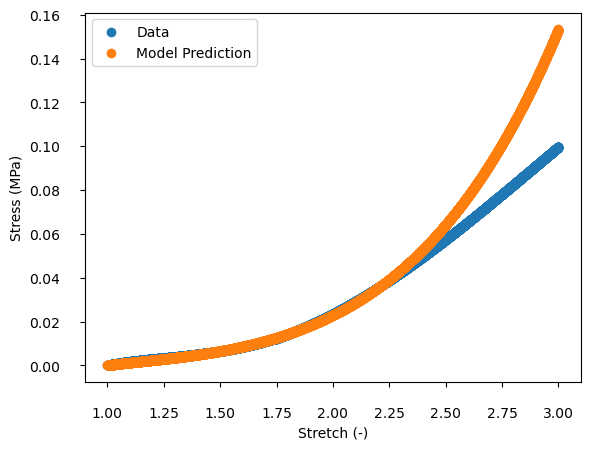

In [ ]:
plt.scatter(lam_ut, P_ut)
plt.scatter(lam_ut, Stress_predict_UT)
plt.legend(['Data', 'Model Prediction'])
plt.xlabel('Stretch (-)')
plt.ylabel('Stress (MPa)')